# Try to infer similarity of sequences with hashes

This is not rigourous as alignment, but is cheap enough that we could to it pairwise. Why?
- Split train/test data considering protein distance quicky, or even stratified folds

In [1]:
"""Use kgrams to compute MinHashes for proteins in both sets"""
from datasketch import MinHash, MinHashLSH
from nltk import ngrams

from Bio import SeqIO
VERBOSE = True

In [2]:
ex_seq = "MLDDRLDDGLATEPGVRAGGGGRTGRPLTAAQRGSWFGHQLDPAHPIYNQSSYLEIHGPV\
DVAAFERAVRQAVGETDALHVRFEVADGTPVQVPHRQDDWPFPVIDVAGEPDPLAVAEAW\
MAEDTRRPVELDGGRLFGQALFRVADDRYLWYQRYHHIVLDGFGVWLLTRRVSRLYDAAL\
AGRAAPEPPLPPLRLLLEDDLAYQASDERAADARYWAERFADRPDPVLLGGRSAPAGPAY\
HQQRDAVPERVFARLRALAERLGVRWSRVAVASLAAYLYRVTGRDDLVISLPVTGRVTSA\
SRTVPGMLANLQPLRLSLRPDMTVRELVAQVADRTEQALAHQRYPFQELRRDLTLPADWP\
KLYGPIVNVLAFSAEPRFGGHTATRQWLAIGPVDDIEFMVHERPHHGGLRLNLWANPQVY\
SEAAVSAHRRRVLHMLEQLAEAEPDTPLSRLDAATPDERRMTVETWNDTARSHPVASVPA\
LFRRQVAQSADAPAVLFEGETLSYRELNERANRLARFLVDSGVRAEDRVALALPRAPELV\
VAMLAVLKAGAAYVPVDPDYPAERIAYILDDSRPAAVVTARSTDAAVGDHASRRVVLDEI\
ADDLARLDAADLDETPDPHQAAYVIYTSGSTGAPKGVVVSHAGTAALAATQAERLRVGPG\
DRVLQFASPSFDAAFWETVMALLSGAALVVAPSERLRPGPDLAALAAEYDVTHLTLPPSA\
LAALPDGGLPEQATLVSAGEALTPDLMRRWSAGRRMINAYGPTETTVCATMSDPLTDRSA\
PLIGRPVDDARVYVLDACLRPVPPGVTGELYVAGAGLARGYVNRPDLTAERFVAAPWGAP\
GERMYRTGDLVRWTEDGALEFVGRADDQVKVRGFRVELGEIEAVLADHTGVAQAAAAVRG\
SGPDAVLAAYVVPRAPADTPDEGELREHLARRLPAHMVPGVFVRLDALPLTPNGKVDRAA\
LPDPQFAARPARRVPRTPEEEILCRLFAEVLDRPAASVGIDDDFFDLGGHSLAATKLIGK\
VRGTLGADLAVKDVFSEGTVAALAKKLDGASRHRPPVEAERRPDPLPLSFEQRRLWFLNT\
LEPSPTYNIPLVLRISGPLDVSALRAALADVTRRHEVLRTSYPDVGGTPGQVIHDDYAPQ\
LEVVRVAEDVLDDALAAAARHRFDLAAAPPLKATLFEVAPDRHALMLVLHHIACDGWSLR\
PLLRDLETAYAARRAGRRPTWAPLPVQYADYALWQRRALGDADAPDSIAGQQLAYWRTQL\
ADLPGDLPLPADRPRPAVTTYQGDMVPVRLSARSHRRLLELARDSRTTLFMVLQAGLAAL\
LTRHGAGTDIPLGTTIAGRGDDALDDLVGCFVNTLVLRTDTAGDPTFRELLGRVRDTDLA\
AYQHQDLPFEKLVESINPERSLSRQPLFQVMLALQSAPAADPALAGLKVEAEPVGAGVAR\
FDLTFSLTERWDADGDPAGVDGFLEFSTDLFDPQTARALVDRFARLLDAAAQTPDRRISE\
LDVLSEEELRRIFQSWNDTDYAPARVPGSVHAAFAEQVARTPDAVAAQGVTYRQLDVRAN\
RLAHRLRELGVRAESAVAILQERSVDLLVSTLAVLKAGGAYVPLHHSDPAARQERIMAEA\
GARVLLTDRAMRDRAPSAAQVVVVDDDPQLAAQPETDPAVPARPEQLAYVMYTSGSTGTP\
KGIGITHQDVLSFARDRRWSGLGRDRVLLRSPHAFDASTFEIWVPLLHGGEIVLAPPGEL\
DAPTLARLLTTERVSVAFFTTALFNLLVDEHPDCLSGLREVWTGGEFVSPQAIRRALQAC\
PDTTVVHVYGPTEMTTYATCHPMRTPYPVRDDNVPIGRPMDNVRAYVLDDRLRPVPPGVA\
GELYLAGEGMARGYVARPDLTAERFVASPFGEPGERMYRTGDLVRWTAEGELEFLGRVDQ\
QVKLRGFRIEPGEIQAVLHEHPQVAQAAVVVREDRPGRKELVGYLVAAEGTAPDLDELRR\
HVARRLPEYMVPAHFVPLAALPLNANHKVDVGRLPAPEVGAPTAARAPRTPQEEILCGLF\
AEVLGLAAVGVDDDFFHLGGHSLLATRLVSRVRSVLGVELPIRALFESPTPAALAERLDD\
DRAV"

In [3]:
def compute_hash(seq, k=3, n=5):
    """seq: str of protein sequence
    k: size of k grams
    n: number of permutations for minhash
    """
    minhash = MinHash(n)
    grams = ngrams(seq, k)
    for g in grams:
        minhash.update("".join(g).encode('utf-8'))
    
    if VERBOSE:
        print(f"grams: {grams}")
        print(f"hash: {minhash}")
    return minhash
    

In [4]:
hash_ = compute_hash(ex_seq)

grams: <zip object at 0x7f17ed4e2740>
hash: <datasketch.minhash.MinHash object at 0x7f186a345690>


In [5]:
hash_.hashvalues

array([10688272,  2020509,  3615042,  1527475, 10085235], dtype=uint64)

In [6]:
VERBOSE=False

## create and index on the hashes of all train sequences

In [40]:
n_perm = 10
threshold = 0.5 
i=0

hash_index = MinHashLSH(threshold, n_perm)
with hash_index.insertion_session() as session:
    with open("../data/train.fasta") as handle:
        for record in SeqIO.parse(handle, "fasta"):
            
            hash_ = compute_hash(str(record.seq), k=3, n=n_perm)
            session.insert(str(record.id), hash_)
            i += 1
            if i % 100 == 0 :
                print(i)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [41]:
hash_index

### check for similarity of a new protein

In [42]:
new_hash = compute_hash(ex_seq,  k=3, n=n_perm)

In [44]:
print(f"Found {len(hash_index.query(new_hash))} sequences with > 0.5 Jaccard similarity")

101

## Check pairwise distances for 3 subsets:
- random proteins
- high local alignment scoring proteins
- a model MSA

2nd should be significantly different that the first, and the third is ideally alos different

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics
import scipy.stats
import itertools
import pandas as pd

from joblib import Parallel, delayed

In [8]:
n_perm=100
VERBOSE=False

### A random sample

In [9]:
random_hashes = []
i=0
with open("../data/train.fasta") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        if np.random.uniform() > 0.05:
            continue
        random_hashes.append(compute_hash(str(record.seq), k=3, n=n_perm))
        i +=1
        if i > 100:
            break

In [10]:
combs = list(itertools.combinations(random_hashes, 2))

In [11]:
distances = Parallel(n_jobs=10)(delayed(lambda a, b: a.jaccard(b))(*c) for c in combs)

(0.0, 1.0)

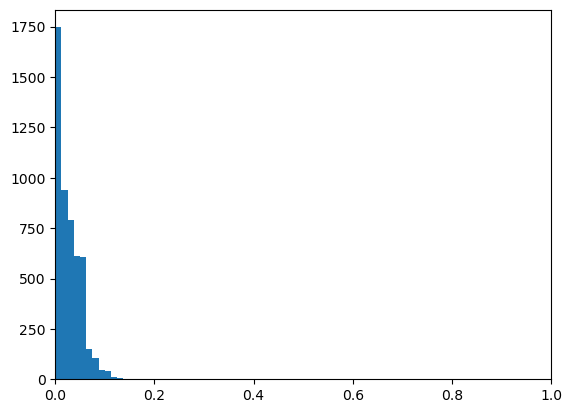

In [12]:
plt.hist(distances, bins=20)
plt.xlim(0,1)

In [13]:
distances=np.array(distances)

In [14]:
# (100*p)th percentile of the standard normal distribution
zp = scipy.stats.norm.ppf(0.95)

# gth quantile of a non-central t distribution
# with n-1 degrees of freedom and non-centrality parameter np.sqrt(n)*zp
t = scipy.stats.nct.ppf(0.95, df=len(distances)-1, nc=np.sqrt(len(distances))*zp)

# k factor from Young et al paper
k = t / np.sqrt(len(distances))

# One-sided tolerance upper bound
conf_upper_bound = distances.mean() + (k*distances.std(ddof=1))
conf_upper_bound

0.06595220709796608

95% sure that 95% of the time, a random 2 proteins will have jaccard distance less than above

### high local alignment mentric examples

In [29]:
pairs = pd.read_csv('../data/Sample.csv', index_col=0)

<AxesSubplot: >

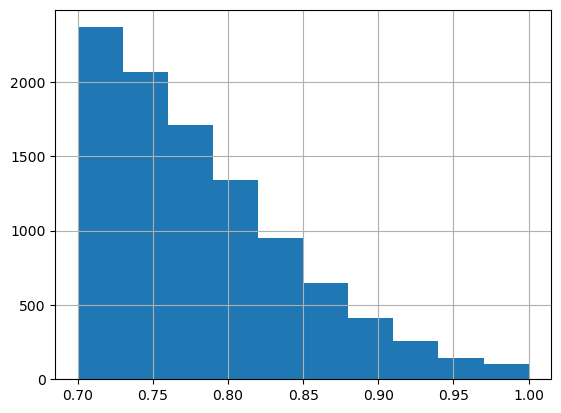

In [30]:
pairs['scaled_local_symmetric_percent_id'].hist()

In [32]:
pairs.columns

Index(['prot_pair_index', 'meso_seq', 'thermo_seq', 'meso_ogt', 'thermo_ogt',
       'scaled_local_symmetric_percent_id', 'local_E_value',
       'scaled_local_query_percent_id', 'local_gap_compressed_percent_id'],
      dtype='object')

In [33]:
distances = []
for _, row in pairs.iterrows():
    m = compute_hash(str(row['meso_seq']), k=3, n=n_perm)
    t = compute_hash(str(row['thermo_seq']), k=3, n=n_perm)
    distances.append(m.jaccard(t))

(0.0, 1.0)

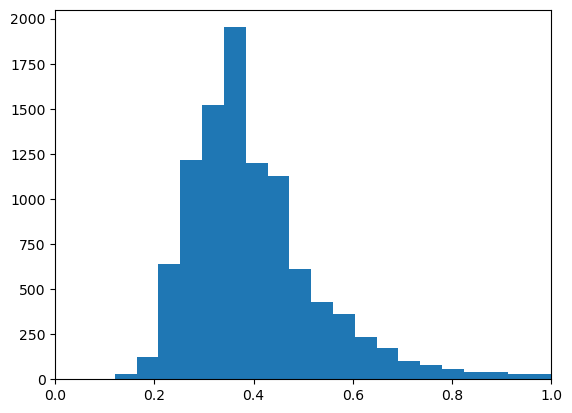

In [34]:
plt.hist(distances, bins=20)
plt.xlim(0,1)

In [37]:
distances = np.array(distances)

In [38]:
scipy.stats.t.interval(confidence=0.95, df = len(distances)-1, loc=distances.mean(), scale = scipy.stats.sem(distances))

(0.3971107105403734, 0.40232528945962664)

Sequences pairs with at least 70% identity have jaccard score between the above on average

The 5th percentile is below, which is still significantly different from random sequences. test passed

In [41]:
np.quantile(distances, 0.05)

0.24

### And now sequences that match a homology search

In [42]:
homo_hashes = []

In [46]:
i = 0
with open("../data/kinase_homolog_hits.fa") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        homo_hashes.append(compute_hash(str(record.seq), k=3, n=n_perm))
        i +=1
        if i > 100:
            break

In [48]:
combs = list(itertools.combinations(homo_hashes, 2))

In [49]:
distances = Parallel(n_jobs=10)(delayed(lambda a, b: a.jaccard(b))(*c) for c in combs)

(0.0, 1.0)

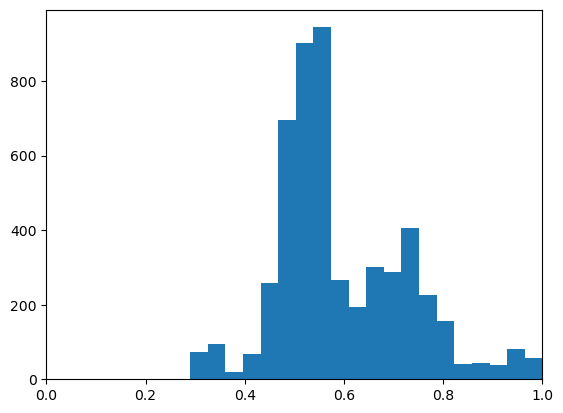

In [50]:
plt.hist(distances, bins=20)
plt.xlim(0,1)

In [51]:
distances = np.array(distances)
scipy.stats.t.interval(confidence=0.95, df = len(distances)-1, loc=distances.mean(), scale = scipy.stats.sem(distances))

(0.5894772995959406, 0.5966807279715222)

In [52]:
np.quantile(distances, 0.05)

0.44

This one is even better than > 70% id, this is sick